# Assessment 2 - COVID DATA PREPARATION TASKS


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# Reading and Previewing the COVID-19 deaths CSV dataset

deaths_df = pd.read_csv('AT2 Folder/time_series_covid19_deaths_global.csv')
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [5]:
# Checking for missing values in the dataset
deaths_df.isnull().sum()

,0
Province/State,198
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
3/5/23,0
3/6/23,0
3/7/23,0
3/8/23,0


In [6]:
deaths_df = pd.read_csv('AT2 Folder/time_series_covid19_deaths_global.csv', na_values=['NULL'])
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [7]:
# Checking for the number of duplicate rows
deaths_df.duplicated().sum()

np.int64(0)

In [8]:
# Convert the date column to a consistent date format (e.g., YYYY-MM-DD)


# Choosing which columns(date columns) to convert and update
non_date_columns = deaths_df.columns[:4].tolist()  # Keep first 4 columns as they are
date_columns = deaths_df.columns[4:]

# Converting date columns
formatted_date_columns = pd.to_datetime(date_columns).strftime('%Y-%m-%d').tolist()

# Joining the non date columns and the date columns together
deaths_df.columns = non_date_columns + formatted_date_columns

# Preview the updated columns
deaths_df

<ipython-input-8-03cad1f39ea4>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  formatted_date_columns = pd.to_datetime(date_columns).strftime('%Y-%m-%d').tolist()


,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [9]:
# Saving the cleaned dataset
deaths_df.to_csv('cleaned_time_series_covid19_deaths_global.csv', index=False)

### 3. Display first 5 rows of the loaded data (1 mark) and do a short summary about the data

In [27]:
# Display the first 5 rows
deaths_df.head()



,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [28]:
deaths_df.info()  # Short summary of the rows, columns and their data types , Range Index indicate the rows in this case

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 2023-03-09
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


### 4. Calculate the mean and median of the daily cases.

In [11]:
# Select date columns - This is to select just the columns that are dates
date_columns = deaths_df.columns[4:]

# Calculate daily deaths by difference - This is to get the daily dates by substracting cumulative of the previous day from the cumulative of today cases
daily_death_cases = deaths_df[date_columns].diff(axis=1)

# Replace first column NaN
daily_death_cases.iloc[:, 0] = deaths_df[date_columns].iloc[:, 0]
daily_death_cases

# This is to give us a 1D NumPy array of all daily cases across all the countries.
entire_daily_deaths = daily_death_cases.values.flatten()

# Calculating Mean and Median
daily_mean = entire_daily_deaths.mean()
daily_median = pd.Series(entire_daily_deaths).median()

# Display of the mean and median
print(f"Mean: {daily_mean}")
print(f"Median: {daily_median}")


Mean: 20.833301546649228
Median: 0.0


### 5. Get daily death cases worldwide (hint: summarizing daily death cases over all countries.)

In [12]:
# Adding all deaths across all countries for each day
world_daily_deaths = daily_death_cases.sum(axis=0)

# Display the worldwide daily death cases
print(world_daily_deaths)

2020-01-22      17.0
2020-01-23       1.0
2020-01-24       8.0
2020-01-25      16.0
2020-01-26      14.0
               ...  
2023-03-05     148.0
2023-03-06     366.0
2023-03-07     923.0
2023-03-08    1445.0
2023-03-09    1319.0
Length: 1143, dtype: float64


### 6. Get daily increasement of deaths cases via defining a function (hint: use the death cases of today minus the death cases of yesterday from the data obtained in task 5.)

In [13]:
# Note: This function helps to determine by much there was an increase with respect to the previous day's result i.e if the previous day was 13 cases and today is 2 cases, it is assumed that they wasn't an increase but rather a decrease the cases

# Define a function
def daily_death_increase(series):
    return series.diff().fillna(series.iloc[0])

# Apply function on worldwide daily deaths
global_daily_death_increment = daily_death_increase(world_daily_deaths)


# Display result
print(global_daily_death_increment)


2020-01-22     17.0
2020-01-23    -16.0
2020-01-24      7.0
2020-01-25      8.0
2020-01-26     -2.0
              ...  
2023-03-05   -128.0
2023-03-06    218.0
2023-03-07    557.0
2023-03-08    522.0
2023-03-09   -126.0
Length: 1143, dtype: float64


### 7. Visualize the data obtained in task 5 with library matplotlib

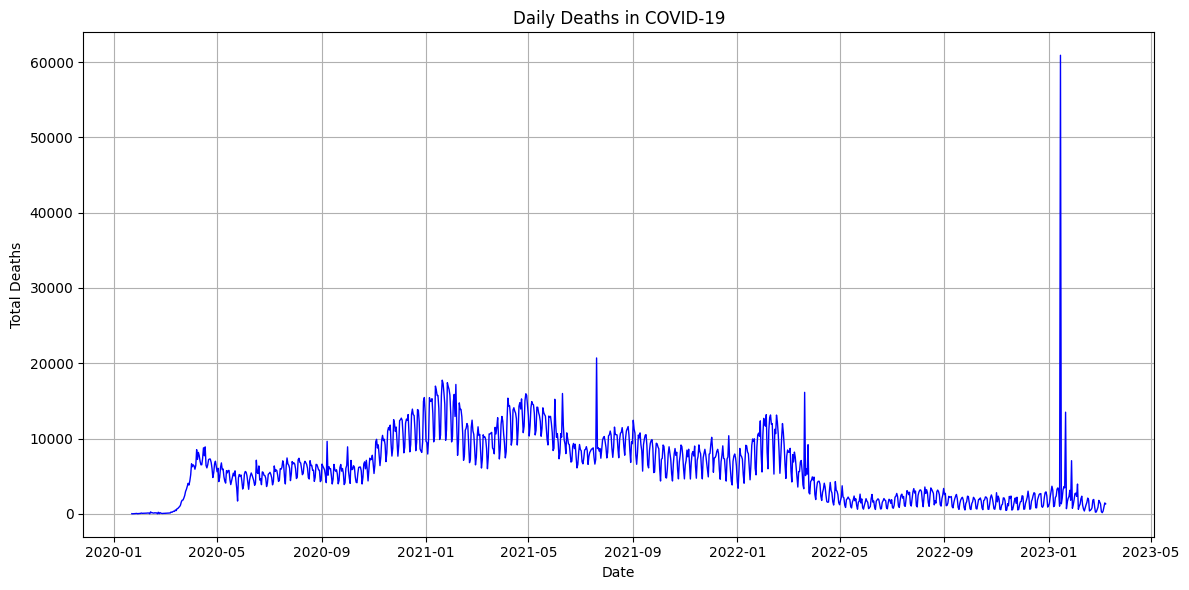

In [46]:
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
# Set figure size
plt.figure(figsize=(12,6))

# Plot - A line graph to show the trend over time as the days goes by
plt.plot(world_daily_deaths.index, world_daily_deaths.values, color='blue', linewidth=1)
plt.title('Daily Deaths in COVID-19')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


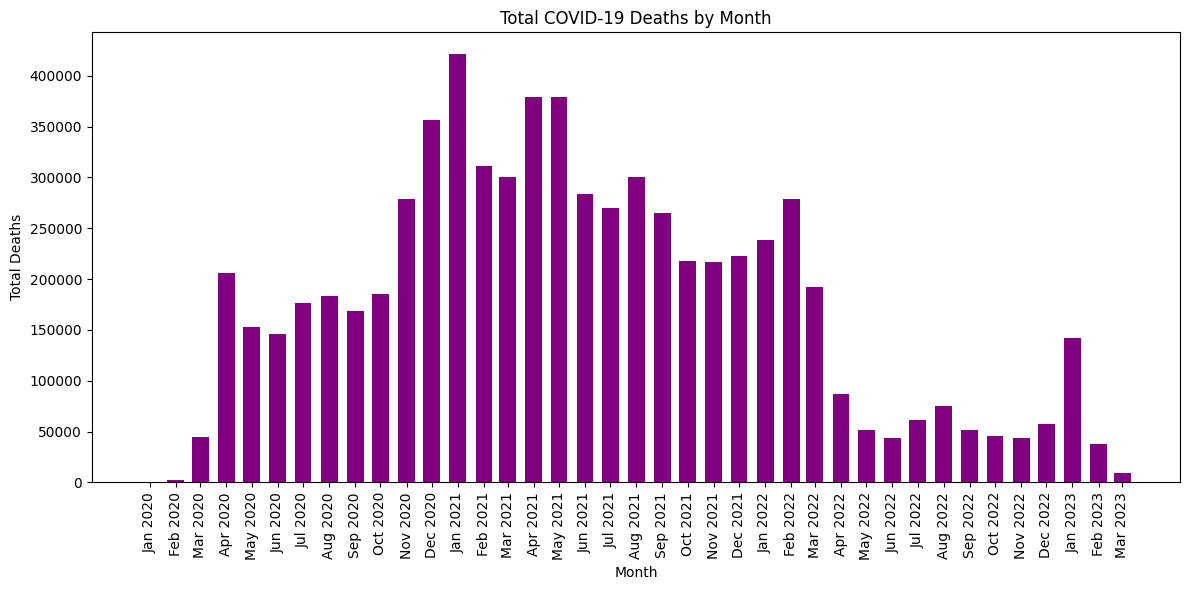

In [42]:
# Visual to display Total covid deaths by months

# Ensure the index is in datetime format
world_daily_deaths.index = pd.to_datetime(world_daily_deaths.index)

# Group by month and sum
deaths_by_months = world_daily_deaths.groupby(world_daily_deaths.index.to_period('M')).sum()

# Convert Period Index to datetime for plotting
deaths_by_months.index = deaths_by_months.index.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
plt.bar(deaths_by_months.index, deaths_by_months.values, width=20, color='purple')
plt.title('Total COVID-19 Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Total Deaths')


# Format x-axis to show the month and year
month_labels = [date.strftime('%b %Y') for date in deaths_by_months.index]
plt.xticks(ticks=deaths_by_months.index, labels=month_labels, rotation=90)

plt.tight_layout()
plt.grid(False)
plt.show()


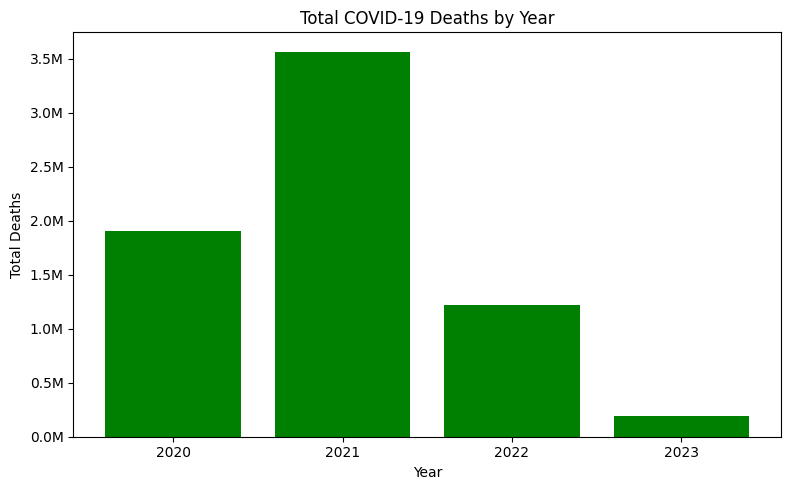

In [32]:
# Visual to display Total covid deaths by Year

# Group by year and sum
deaths_by_year = world_daily_deaths.groupby(world_daily_deaths.index.to_period('Y')).sum()

# Properties of the Plot
plt.figure(figsize=(8,5))
plt.bar(deaths_by_year.index.year, deaths_by_year.values, color='green')
plt.title('Total COVID-19 Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.tight_layout()

# Format y-axis to show in millions unit
formatter = ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Formatting the x-axis show years as normal integers
years =deaths_by_year.index.year
plt.xticks(ticks=years, labels=[str(int(year)) for year in years])

plt.grid(False)
plt.show()
